# Exc. Pre1

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

In [2]:
subsets = [2, 3, 5, 7, 10, 13, 17]

X = np.random.uniform(-1, 1, (100_000, 17))
X = pd.DataFrame(X)

X.shape

(100000, 17)

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.888947,-0.896058,-0.365453,0.373724,0.584175,-0.602391,0.118035,-0.101272,0.917376,-0.094569,0.025755,-0.053562,0.684830,0.835533,-0.939849,0.985204,-0.628116
1,-0.263265,0.392367,0.729399,0.796937,-0.657859,0.544137,0.861721,-0.705188,-0.185081,-0.318985,0.816703,0.068630,-0.456469,-0.980285,0.573026,0.056427,-0.527242
2,0.769820,0.102788,0.599657,0.213014,0.166478,0.262233,0.882090,-0.523351,0.527937,0.973103,0.991502,-0.960987,0.714566,-0.042996,-0.048510,-0.359013,0.153666
3,-0.343935,0.770574,0.182990,-0.265789,0.631227,-0.576378,0.243573,-0.459867,0.436846,0.656460,0.494109,0.615552,0.581916,0.451469,-0.938451,0.045344,0.687986
4,0.296536,-0.744768,-0.797726,0.290636,-0.944566,0.853963,-0.715697,-0.128268,0.928580,0.501525,-0.836036,-0.867630,0.703098,0.472036,0.883736,0.707933,0.287246


In [4]:
def is_inside_sphere(row):
    orig = [0] * subset
    dist = euclidean(row.iloc[:subset], orig)
    res = False
    if (dist <= 1):
        res = True
    return res

In [5]:
for subset in subsets:
    is_inside = X.iloc[:, :subset].apply(is_inside_sphere, axis = 1)
    prop = np.mean(is_inside)
    print(f"Proportion inside (d = {subset}): {prop:.3f}")

Proportion inside (d = 2): 0.784
Proportion inside (d = 3): 0.523
Proportion inside (d = 5): 0.165
Proportion inside (d = 7): 0.036
Proportion inside (d = 10): 0.003
Proportion inside (d = 13): 0.000
Proportion inside (d = 17): 0.000


In [6]:
def is_inside_shell(row):
    orig = [0] * subset
    dist = euclidean(row.iloc[:subset], orig)
    res = False
    if (0.95 <= dist <= 1.00):
        res = True
    return res

In [7]:
for subset in subsets:
    is_inside = X.iloc[:, :subset].apply(is_inside_shell, axis = 1)
    prop = np.mean(is_inside)
    print(f"Proportion inside (d = {subset}): {prop:.3f}")

Proportion inside (d = 2): 0.076
Proportion inside (d = 3): 0.075
Proportion inside (d = 5): 0.038
Proportion inside (d = 7): 0.011
Proportion inside (d = 10): 0.001
Proportion inside (d = 13): 0.000
Proportion inside (d = 17): 0.000


# Exc. Pre2

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [2]:
subsets = [1, 2, 4, 7, 10, 15]

data = np.random.normal(0, 1, (2_000, 15))
data = pd.DataFrame(data)

data.shape

(2000, 15)

In [3]:
data["y"] = data[0] + np.sin(5 * data[0])

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,y
0,-0.265872,0.097732,-0.170954,1.243712,-0.346277,-1.314260,0.522105,-1.072385,-1.084357,-0.236067,0.025722,1.795411,-1.569025,-2.632211,0.214343,-1.236867
1,-1.005287,0.130620,0.918353,-0.127691,-3.087944,0.165309,0.110125,-0.937914,0.134243,0.123685,1.311503,0.287284,1.687031,0.325120,0.232306,-0.054196
2,-1.202874,1.128879,-1.756810,-2.599564,-1.818339,-0.480935,0.822817,0.369462,0.352486,-0.121505,0.001142,0.950988,0.415213,1.880142,0.956353,-0.937283
3,0.141076,0.568771,-0.124093,-0.185218,-1.248170,-0.669309,0.175119,-0.179057,-1.615647,-1.055314,-1.660331,0.045917,-0.227117,0.347297,1.023777,0.789399
4,-1.428156,1.454423,-0.104670,-1.617940,1.242614,-0.083412,0.712097,-0.123655,1.317261,-1.628742,-1.107571,-0.539651,0.208525,-0.372966,0.297150,-2.184426


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop("y", axis = 1),
    data["y"],
    test_size = 0.5
)

In [13]:
x_train.shape

(1000, 15)

In [5]:
x_test.shape

(1000, 15)

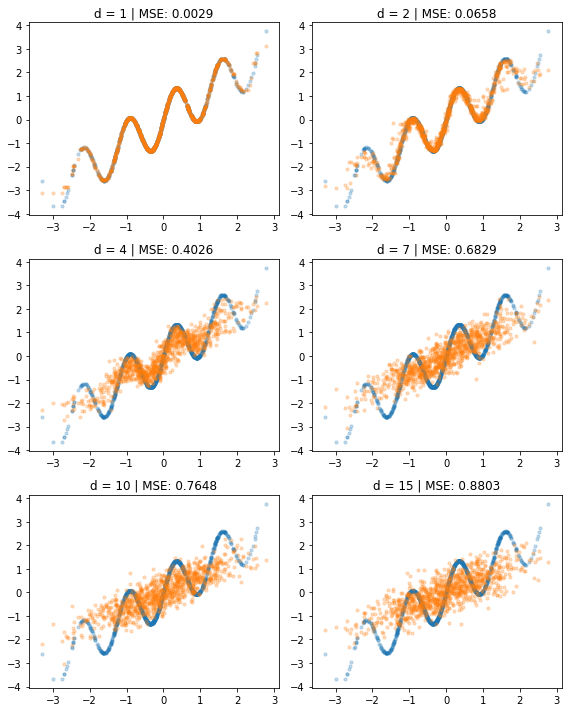

In [13]:
fig = plt.figure(figsize = (8, 10))

for i, dim in zip(range(6), subsets):
    model = KNeighborsRegressor(n_neighbors = 5, p = 2)
    model.fit(x_train.iloc[:, :dim], y_train)
    y_pred = model.predict(x_test.iloc[:, :dim])
    test_loss = mean_squared_error(y_test, y_pred)
    plt.subplot(3, 2, i + 1)
    plt.scatter(x_test[0], y_test, alpha = 0.25, s = 10)
    plt.scatter(x_test[0], y_pred, alpha = 0.25, s = 10)
    plt.title(f'd = {dim} | MSE: {test_loss:.4f}')
plt.tight_layout()
plt.savefig('pre2.png')
plt.show()

# Exc. B2

In [66]:
from sklearn.decomposition import PCA

In [67]:
data = pd.read_csv("./input/winequality-red.txt", sep = " ", header = None)

labels = data.iloc[:, 11]
labels.loc[labels <= 5] = 1
labels.loc[labels == 6] = 2
labels.loc[labels >= 7] = 3

data = data.drop(11, axis = 1)

data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [68]:
labels.value_counts()

1    744
2    638
3    217
Name: 11, dtype: int64

In [69]:
pca = PCA(n_components = 11)

z = pca.fit_transform(data)

In [70]:
var_expl = sum(pca.explained_variance_ratio_[0:2])

print(f"Variance explained by first 2 components: {var_expl:.3f}")

Variance explained by first 2 components: 0.995


In [71]:
z.shape

(1599, 11)

In [72]:
print(pca.components_[:, 0:2])

[[-6.13247431e-03  3.84465551e-04]
 [-2.38994985e-02 -2.00966661e-03]
 [ 9.53135980e-01 -2.51315387e-02]
 [-2.65092214e-01  7.27374987e-03]
 [ 9.81476468e-02 -4.11570558e-02]
 [-7.93123729e-02 -6.89241790e-01]
 [ 1.11415873e-02  4.64366208e-01]
 [-6.49066070e-02  3.38841054e-01]
 [-1.62056112e-02  4.28631866e-01]
 [ 1.11894679e-02 -9.15867655e-02]
 [-9.42137146e-04 -7.18832280e-04]]


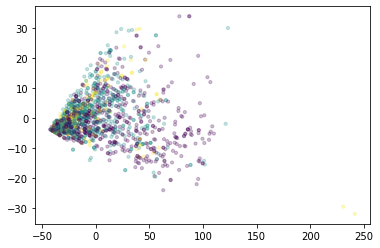

In [73]:
plt.scatter(z[:, 0], z[:, 1], alpha = 0.25, s = 10, c = labels)
plt.savefig("b2.png");

In [74]:
data = pd.read_csv("./input/winequality-white.txt", sep = " ", header = None)

labels = data.iloc[:, 11]
labels.loc[labels <= 5] = 1
labels.loc[labels == 6] = 2
labels.loc[labels >= 7] = 3

data = data.drop(11, axis = 1)

data.head()

C:\Users\antti\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,0,1,2,3,4,5,6,7,8,9,10
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [75]:
labels.value_counts()

2    2198
1    1640
3    1060
Name: 11, dtype: int64

In [76]:
pca = PCA(n_components = 11)

z = pca.fit_transform(data)

In [77]:
var_expl = sum(pca.explained_variance_ratio_[0:2])

print(f"Variance explained by first 2 components: {var_expl:.3f}")

Variance explained by first 2 components: 0.989


In [78]:
z.shape

(4898, 11)

In [79]:
print(pca.components_[:, 0:2])

[[ 1.54440234e-03  1.69003682e-04]
 [-9.16349763e-03 -1.54546977e-03]
 [ 1.29002621e-02  9.28887403e-04]
 [-1.47657857e-01  1.54517098e-02]
 [ 9.84964681e-01 -3.97807571e-03]
 [ 7.34101708e-02 -1.06674771e-01]
 [-4.86697206e-02 -3.24714977e-01]
 [-4.96313432e-03  1.62243361e-01]
 [-1.01243103e-03  9.25157536e-01]
 [ 2.21708457e-03 -2.61350775e-02]
 [-7.70801888e-04 -6.33173210e-04]]


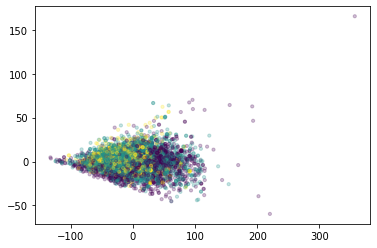

In [80]:
plt.scatter(z[:, 0], z[:, 1], alpha = 0.25, s = 10, c = labels)
plt.savefig('b2_white.png');

In [81]:
col_vars = np.var(data, axis = 0)
col_vars = col_vars.sort_values(ascending = False)
col_vars

6     1805.716751
5      289.183667
3       25.720518
10       1.514118
0        0.711968
8        0.022797
2        0.014643
9        0.013022
1        0.010157
4        0.000477
7        0.000009
dtype: float64

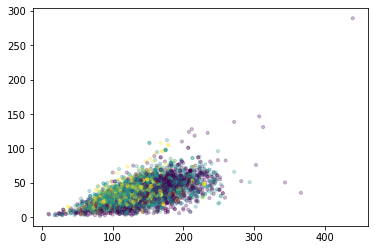

In [82]:
top_cols = list(col_vars[0:2].index)

plt.scatter(data[top_cols[0]], data[top_cols[1]], alpha = 0.25, s = 10, c = labels)
plt.savefig('b2_var.png');

# Exc. B3

In [83]:
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

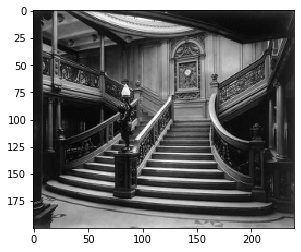

In [84]:
img = Image.open('./input/staircase.png')

plt.imshow(img, cmap = "gray");

In [85]:
img = np.array(img)

h = img.shape[0]
w = img.shape[1]

h_block = 10
w_block = 10

(h, w)

(200, 240)

In [86]:
n_blocks_h = h // h_block
n_blocks_w = w // w_block

(n_blocks_h, n_blocks_w)

(20, 24)

In [87]:
X = np.zeros((n_blocks_h * n_blocks_w, h_block * w_block))

X.shape

(480, 100)

In [88]:
i_obs = 0

for col in range(n_blocks_w):
    for row in range(n_blocks_h):
        i_start_h = row * h_block
        i_end_h = (row + 1) * h_block
        i_start_w = col * w_block
        i_end_w = (col + 1) * w_block
        block = img[i_start_h:i_end_h, i_start_w:i_end_w]
        X[i_obs, :] = np.reshape(block, -1)
        i_obs += 1

In [89]:
def PCA_image(X, n_dim):
    pca = PCA(n_components = n_dim)
    X_pca = pca.fit_transform(X)
    X_inv = pca.inverse_transform(X_pca)
    img_inv = np.zeros((h, w))
    i_obs = 0
    for col in range(n_blocks_w):
        for row in range(n_blocks_h):
            block = X_inv[i_obs, :]
            block = np.reshape(block, (h_block, w_block))
            i_start_h = row * h_block
            i_end_h = (row + 1) * h_block
            i_start_w = col * w_block
            i_end_w = (col + 1) * w_block
            img_inv[i_start_h:i_end_h, i_start_w:i_end_w] = block
            i_obs += 1
    plt.imshow(img_inv, cmap = 'gray');
    plt.title(f'Reconstructed from {n_dim} dimensions')
    plt.xticks([])
    plt.yticks([])

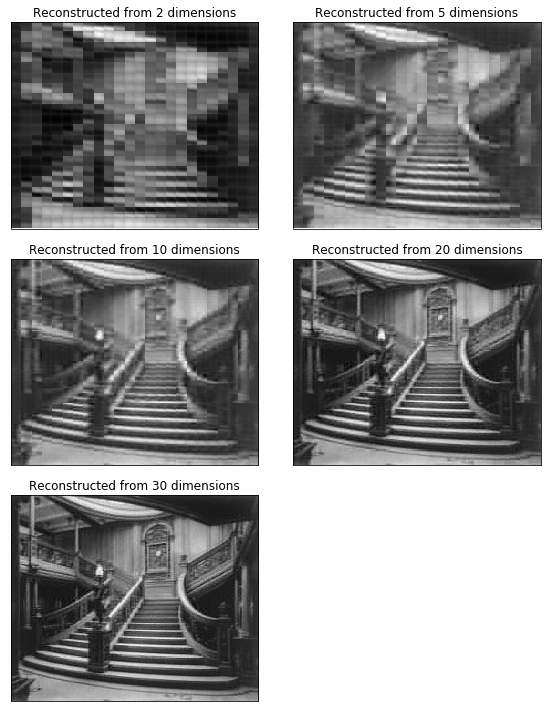

In [103]:
dims = [2, 5, 10, 20, 30]

fig = plt.figure(figsize = (8, 10))
for i, dim in zip(range(5), dims):
    plt.subplot(3, 2, i + 1)
    PCA_image(X, dim)
plt.tight_layout()
plt.savefig('b3.png')
plt.show()

In [104]:
pca = PCA(n_components = 30)
X_pca = pca.fit_transform(X)

comps = pca.components_

comps.shape

(30, 100)

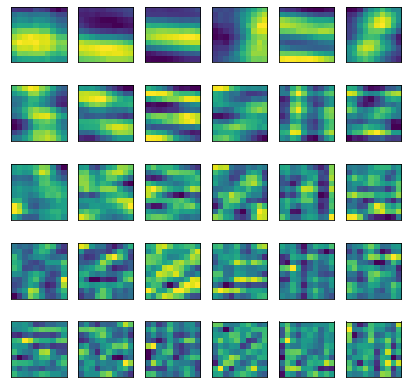

In [105]:
fig = plt.figure(figsize = (7, 7))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    block = comps[i, :]
    block = np.reshape(block, (h_block, w_block))
    plt.imshow(block) 
    plt.yticks([])
    plt.xticks([])
plt.savefig('b3_filters.png')
plt.show()

# Exc. B4

In [131]:
import time
from scipy.io import wavfile
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd

In [133]:
Fs, signal = wavfile.read('./input/the_entertainer.wav')

signal = np.array(signal)

signal.shape

(3639784,)

In [134]:
sd.play(signal)

time.sleep(3)

sd.stop()

In [135]:
len_block = 100
N = len(signal)
num_blocks = N // len_block

In [136]:
X = np.zeros((num_blocks, len_block))

X.shape

(36397, 100)

In [137]:
for i in range(num_blocks):
    i_start = i * len_block
    i_end = (i + 1) * len_block
    block = signal[i_start:i_end]
    block = np.reshape(block, (1, len_block))
    X[i, :] = block

In [138]:
pca = PCA(n_components = 15)

X_pca = pca.fit_transform(X)

#z = np.int16(z / np.max(np.abs(z)) * 32767)

X_pca.shape

(36397, 15)

In [139]:
X_inv = pca.inverse_transform(X_pca)

X_inv.shape

(36397, 100)

In [140]:
signal_inv = np.zeros((num_blocks * len_block, 1))

for i in range(num_blocks): 
    block = X_inv[i] 
    block = np.reshape(block, (len_block, 1))
    signal_inv[i * len_block:(i + 1) * len_block] = block

In [148]:
sd.play(signal_inv)

time.sleep(3)

sd.stop()

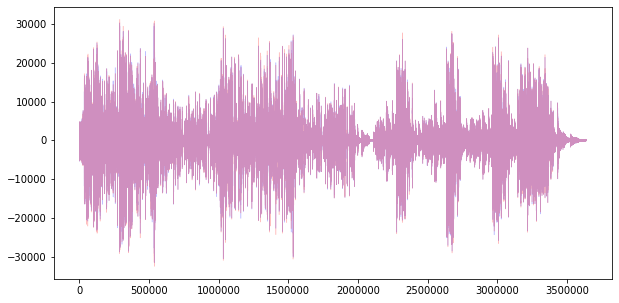

In [142]:
fig = plt.figure(figsize = (10, 5))
plt.plot(signal, linewidth = 0.5, color = 'blue', alpha = 0.25)
plt.plot(signal_inv, linewidth = 0.5, color = 'red', alpha = 0.25)
plt.savefig('b4.png')
plt.show()

In [149]:
wavfile.write("the_entertainer_pca.wav", Fs, signal_inv)

# Exc. B5

In [167]:
from sklearn.decomposition import FastICA
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time

In [168]:
fs1, x1 = wavfile.read('./input/musicmix01.wav')
fs2, x2 = wavfile.read('./input/musicmix02.wav')
fs3, x3 = wavfile.read('./input/musicmix03.wav')
fs4, x4 = wavfile.read('./input/musicmix04.wav')

In [169]:
x1 = np.reshape(x1, (-1, 1))
x2 = np.reshape(x2, (-1, 1))
x3 = np.reshape(x3, (-1, 1))
x4 = np.reshape(x4, (-1, 1))

In [170]:
x = np.concatenate((x1, x2, x3, x4), axis = 1)

x.shape

(1323000, 4)

In [179]:
ica = FastICA(n_components = 4)

z = ica.fit_transform(x)

z = np.int16(z / np.max(np.abs(z)) * 32767)

z.shape

(1323000, 4)

In [172]:
sd.play(x[:, 0])

time.sleep(3)

sd.stop()

In [196]:
sd.play(z[:, 1])

time.sleep(4)

sd.stop()

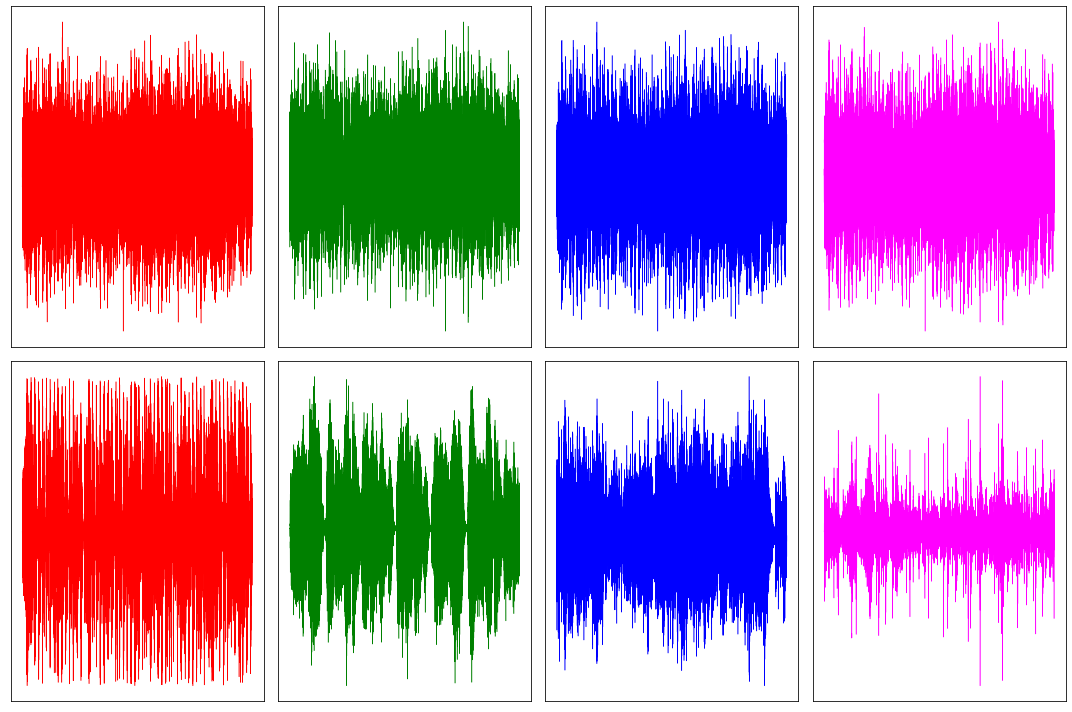

In [199]:
colors = ["red", "green", "blue", "magenta"]

fig = plt.figure(figsize = (15, 10))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.plot(x[:, i], linewidth = 0.5, color = colors[i])  
    plt.xticks([])
    plt.yticks([])
for i in range(4):
    plt.subplot(2, 4, i + 5)
    plt.plot(z[:, i], linewidth = 0.5, color = colors[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('b5.png')
plt.show()

In [200]:
fs1, x1 = wavfile.read('./input/speechmix01.wav')
fs2, x2 = wavfile.read('./input/speechmix02.wav')
fs3, x3 = wavfile.read('./input/speechmix03.wav')
fs4, x4 = wavfile.read('./input/speechmix04.wav')

In [201]:
x1 = np.reshape(x1, (-1, 1))
x2 = np.reshape(x2, (-1, 1))
x3 = np.reshape(x3, (-1, 1))
x4 = np.reshape(x4, (-1, 1))

In [202]:
x = np.concatenate((x1, x2, x3, x4), axis = 1)

x.shape

(889216, 4)

In [203]:
ica = FastICA(n_components = 4)

z = ica.fit_transform(x)

z = np.int16(z / np.max(np.abs(z)) * 32767)

z.shape

(889216, 4)

In [204]:
sd.play(x[:, 0])

time.sleep(3)

sd.stop()

In [209]:
sd.play(z[:, 0])

time.sleep(3)

sd.stop()

# Exc. B6

In [210]:
from PIL import Image
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import numpy as np

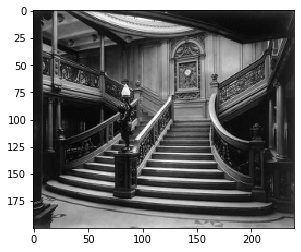

In [211]:
img = Image.open('./input/staircase.png')

plt.imshow(img, cmap = "gray");

In [212]:
img = np.array(img)

h = img.shape[0]
w = img.shape[1]

h_block = 10
w_block = 10

(h, w)

(200, 240)

In [213]:
n_blocks_h = h // h_block
n_blocks_w = w // w_block

(n_blocks_h, n_blocks_w)

(20, 24)

In [214]:
X = np.zeros((n_blocks_h * n_blocks_w, h_block * w_block))

X.shape

(480, 100)

In [215]:
i_obs = 0

for col in range(n_blocks_w):
    for row in range(n_blocks_h):
        i_start_h = row * h_block
        i_end_h = (row + 1) * h_block
        i_start_w = col * w_block
        i_end_w = (col + 1) * w_block
        block = img[i_start_h:i_end_h, i_start_w:i_end_w]
        X[i_obs, :] = np.reshape(block, -1)
        i_obs += 1

In [216]:
col_means = np.mean(X, axis = 0)
col_means = np.reshape(col_means, (1, 100))

col_means.shape

(1, 100)

In [217]:
X = X - col_means

In [222]:
def ICA_image(X, n_dim):
    ica = FastICA(n_components = n_dim)
    X_ica = ica.fit_transform(X)
    W = ica.mixing_
    X_inv = np.dot(X_ica, W.T) + col_means
    img_inv = np.zeros((h, w))
    i_obs = 0
    for col in range(n_blocks_w):
        for row in range(n_blocks_h):
            block = X_inv[i_obs, :]
            block = np.reshape(block, (h_block, w_block))
            i_start_h = row * h_block
            i_end_h = (row + 1) * h_block
            i_start_w = col * w_block
            i_end_w = (col + 1) * w_block
            img_inv[i_start_h:i_end_h, i_start_w:i_end_w] = block
            i_obs += 1
    plt.imshow(img_inv, cmap = 'gray');
    plt.title(f'Reconstructed from {n_dim} dimensions')
    plt.xticks([])
    plt.yticks([])
    plt.savefig('b6.png')
    plt.show()

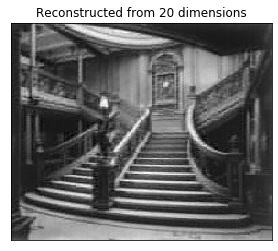

In [223]:
ICA_image(X, n_dim = 20)

In [224]:
ica = FastICA(n_components = 20)
X_ica = ica.fit_transform(X)

comps = ica.components_

comps.shape

(20, 100)

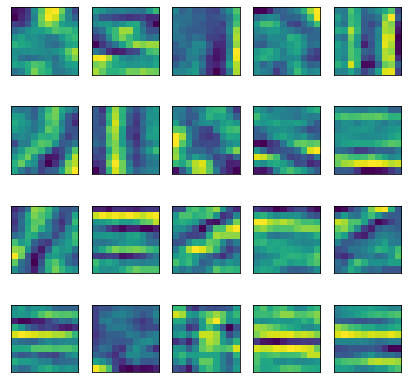

In [225]:
fig = plt.figure(figsize = (7, 7))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    block = comps[i, :]
    block = np.reshape(block, (h_block, w_block))
    plt.imshow(block) 
    plt.yticks([])
    plt.xticks([])
plt.savefig('b6_filters.png')
plt.show()

# Exc. B7

In [245]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [246]:
x = pd.read_csv('./input/winequality-white.txt', sep = ' ', header = None)

labels = x.iloc[:, 11]
labels.loc[labels <= 5] = 1
labels.loc[labels == 6] = 2
labels.loc[labels >= 7] = 3

x = x.drop(11, axis = 1)

x = scale(x)

x = pd.DataFrame(x)

x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [247]:
model = LinearDiscriminantAnalysis(
    solver = 'eigen',
    n_components = 2
)

z = model.fit_transform(x, labels)

z.shape

(4898, 2)

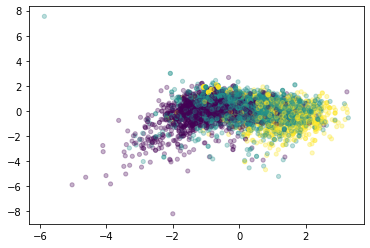

In [248]:
plt.scatter(z[:, 0], z[:, 1], alpha = 0.3, c = labels, s = 17)
plt.savefig('b7.png');

In [287]:
print(model.scalings_[:, 0:2])

[[ 0.14901281 -0.47116449]
 [-0.45734406 -0.92620646]
 [-0.0156547   0.05376547]
 [ 0.89692041 -0.77621957]
 [-0.0198911   0.07966369]
 [ 0.15888859 -0.04566987]
 [-0.0747122  -0.01111712]
 [-0.95726482  1.55740039]
 [ 0.24730878 -0.4139546 ]
 [ 0.18818972 -0.12241619]
 [ 0.68681053  0.56269688]]


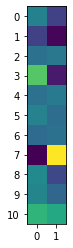

In [289]:
plt.imshow(model.scalings_[:, 0:2])
plt.yticks(range(11))
plt.xticks(range(2))
plt.savefig('b7_proj.png')
plt.show();